Importing the necessary libraries

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Function to calculate LBP (Local Binary Pattern)

In [20]:
def compute_lbp(img_arr):
    img_arr1 = img_arr[:, :, 0]
    img_out = np.zeros((img_arr1.shape[0], img_arr.shape[1]))
    for i in range(1, img_arr1.shape[0]-1):
        for j in range(1, img_arr1.shape[1]-1):
            cen = img_arr1[i, j]
            n1 = img_arr1[i, j-1]>cen
            n2 = img_arr1[i-1, j-1]>cen
            n3 = img_arr1[i-1, j]>cen
            n4 = img_arr1[i-1, j+1]>cen
            n5 = img_arr1[i, j+1]>cen
            n6 = img_arr1[i+1, j+1]>cen
            n7 = img_arr1[i+1, j]>cen
            n8 = img_arr1[i+1, j-1]>cen
            val1 = n1*(2**0) + n2*(2**1)+n3*(2**2)+n4*(2**3)+ n5*(2**4) + n6*(2**5)+n7*(2**6)+n8*(2**7)
            img_out[i, j] = val1
    return img_out

Function to save features to a csv file to further train it on a classifier

In [11]:
def save_features_to_csv(features, csv_filename):
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image', 'Feature'])
        for i, feature in enumerate(features):
            writer.writerow([f'Image_{i+1}', feature])

Main Function to process images in a folder

In [12]:
def process_images_in_folder(input_folder, output_folder, csv_filename):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    features = []
    for i, filename in enumerate(os.listdir(input_folder)):
        img_path = os.path.join(input_folder, filename)
        img_arr = plt.imread(img_path)
        lbp_img = compute_lbp(img_arr)
        plt.imshow(lbp_img)
        plt.savefig(os.path.join(output_folder, f'LBP_{i+1}.png'))
        plt.close()
        
        unique, counts = np.unique(lbp_img, return_counts=True)
        feature = counts
        features.append(feature)

    save_features_to_csv(features, csv_filename)

In [13]:
input_folder = 'Sehaj/Data Analyst/Projects/Stress Detection using Audio/Controlled_feat'
output_folder = 'Controlled_LBP'
csv_filename = 'LBP_Features.csv'

process_images_in_folder(input_folder, output_folder, csv_filename)

In [21]:
df_con = pd.read_csv('LBP_Features_Controlled.csv')
df_pat = pd.read_csv('LBP_Features_Patient.csv')

In [22]:
df1 = pd.concat([df_con,df_pat])

In [23]:
df1.shape

(163, 143)

In [24]:
df1.head()

,Patient_ID,Features,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142
0,308,362897,1,298,154,199,86,6,10,199,...,0,0,0,0,0,0,0,0,0,0
1,309,286770,1,462,751,674,345,122,432,108,...,146,6,21,447,2,9,100,279,0,0
2,311,272987,1,511,867,889,379,101,545,134,...,138,6,21,697,2,9,95,265,0,0
3,319,296275,1,434,664,684,252,105,423,58,...,9,82,237,0,0,0,0,0,0,0
4,330,280037,1,528,935,749,405,95,498,147,...,6,17,703,2,9,71,223,0,0,0


In [25]:
X = np.array(df1)

In [26]:
y = np.concatenate([np.zeros(126),np.ones(37)])

In [29]:
X.shape

(163, 143)

In [30]:
y.shape

(163,)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [11]:
X_train

array([[   361, 261022,      1, ...,      0,      0,      0],
       [   416, 286893,      1, ...,    278,      0,      0],
       [   348, 270353,      1, ...,    279,      0,      0],
       ...,
       [   354, 273585,      1, ...,      8,     87,    293],
       [   406, 297063,      1, ...,      0,      0,      0],
       [   422, 268448,      1, ...,      0,      0,      0]], dtype=int64)

In [12]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear')
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred, average = 'weighted')
print("F1 Score:", f1)

F1 Score: 0.7072649572649572


In [16]:
cost_values = np.linspace(0.1,100,num = 100)
f1_scores = []
for c in cost_values:
    svm_classifier = SVC(kernel = 'linear', C = c)
    svm_classifier.fit(X_train,y_train)
    y_pred = svc_classifier.predict(X_test)
    f1 = f1_score(y_test,y_pred, average = 'weighted')
    f1_scores.append(f1)

In [17]:
f1_scores

[0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572649572,
 0.7072649572

In [40]:
from sklearn.neural_network import MLPClassifier
lrs = np.linspace(0.00001, 0.5, 100)
acc= []
for lr in lrs:
    clf = MLPClassifier(hidden_layer_sizes = ((81,)), learning_rate_init=lr)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc1 = np.sum(y_pred == y_test)/y_test.shape[0]
    acc.append(acc1)

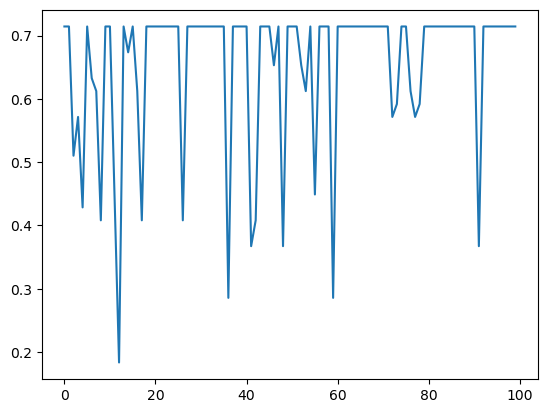

In [41]:
from matplotlib import pyplot as plt
plt.plot(acc)

In [42]:
print(np.max(acc1))

0.7142857142857143


In [43]:
from sklearn.neural_network import MLPClassifier
lrs = np.linspace(0.00001, 0.5, 100)
acc= []
for lr in lrs:
    clf = MLPClassifier(hidden_layer_sizes = ((40,20,)), learning_rate_init=lr)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc1 = np.sum(y_pred == y_test)/y_test.shape[0]
    acc.append(acc1)

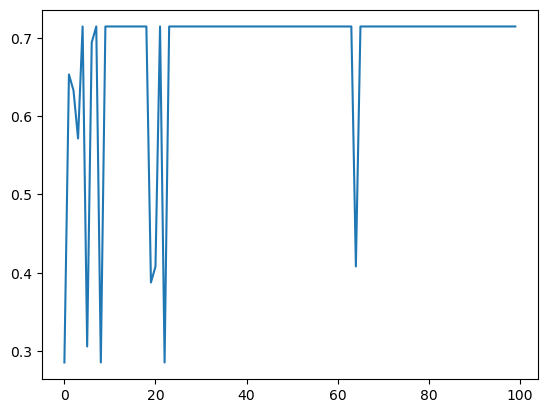

In [44]:
from matplotlib import pyplot as plt
plt.plot(acc)

In [45]:
print(np.max(acc1))

0.7142857142857143


In [49]:
clf = DecisionTreeClassifier(random_state=0)
from sklearn.neural_network import MLPClassifier
lrs = np.linspace(0.00001, 0.5, 100)
acc= []
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc1 = np.sum(y_pred == y_test)/y_test.shape[0]
acc.append(acc1)

In [52]:
from matplotlib import pyplot as plt
print(acc1)

0.9387755102040817
